# Tutorial 3: Plot clusters

This tutorial will talk about how to plot the clusters created from the data in Tutorial 1.

**NOTE FOR CONTRIBUTORS: Always clear all output before commiting (``Cell`` > ``All Output`` > ``Clear``)**!

In [22]:
# Magic
%matplotlib inline
# Reload modules whenever they change
%load_ext autoreload
%autoreload 2

# Make clusterking package available even without installation
import sys
sys.path = ["../../"] + sys.path

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pathlib import Path

from clusterking.plots import ClusterPlot
from clusterking.data.data import Data

In [31]:
import clusterking as ck

As in tutorial 3 we load the data created in tutorial 1:

In [24]:
d = Data("output/cluster/", "tutorial_basics")

DFMD:DEBUG:Loading scanner data from '/home/aebischer/Repositories/clusterking/examples/jupyter_notebooks/output/cluster/tutorial_basics_data.csv'.
DFMD:DEBUG:Loading done.
DFMD:DEBUG:Loading metadata from '/home/aebischer/Repositories/clusterking/examples/jupyter_notebooks/output/cluster/tutorial_basics_metadata.json'.
DFMD:DEBUG:Done.


## Manual Plotting

We create a data frame out of the data and choose colours and markers to make things ready for plotting:

In [27]:
df = d.df
clusters = list(df['cluster'].unique())
colors = ["red", "green", "blue", "pink"]
markers = ["o", "v", "^"]

### Manual 3d Plot

Let's start with 3d plots:

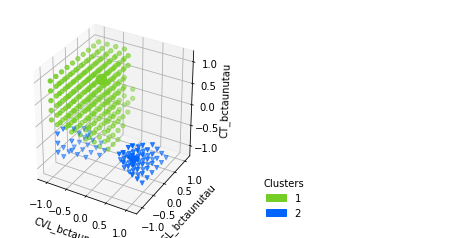

In [34]:
cp = ck.plots.ClusterPlot(d)
cp.scatter(
    ['CVL_bctaunutau', 'CSL_bctaunutau', 'CT_bctaunutau'],
    clusters=[1,2]  # Only plot 2 clusters for better visibility
)

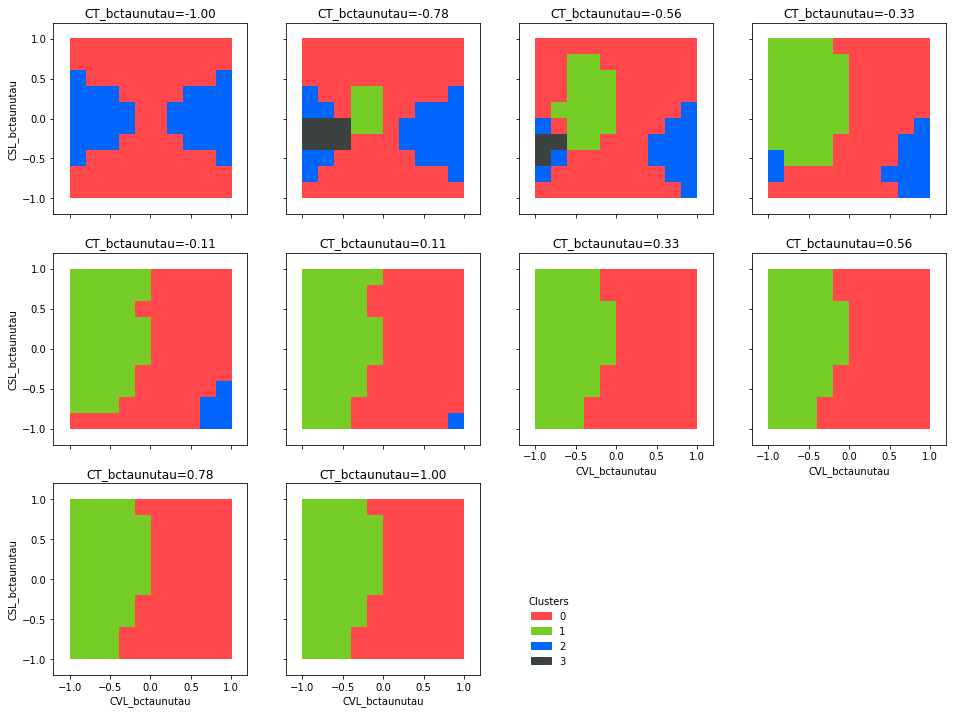

In [35]:
cp.fill(['CVL_bctaunutau', 'CSL_bctaunutau'])

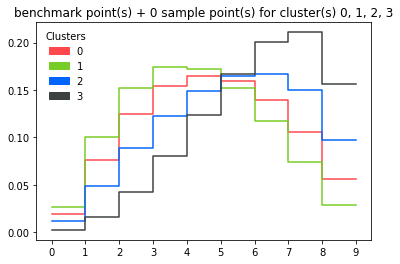

In [36]:
bp = ck.plots.BundlePlot(d)
bp.plot_bundles()

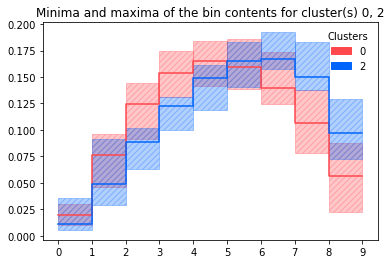

In [37]:
bp.plot_minmax(clusters=[0, 2])

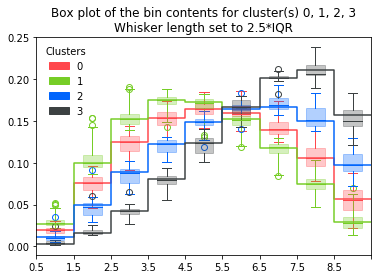

In [38]:
bp.box_plot()

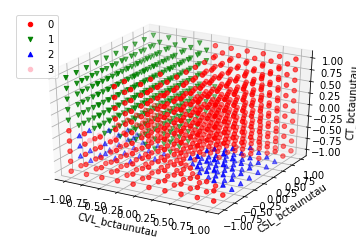

In [28]:
# defining the axes
ax = plt.figure().gca(projection='3d')
ax.set_xlabel('CVL_bctaunutau')
ax.set_ylabel('CSL_bctaunutau')
ax.set_zlabel('CT_bctaunutau')

# running over all the WC values in the cluster
for index, cluster in enumerate(clusters):
    df_cluster = df[df['cluster'] == cluster]
    ax.scatter(
        df_cluster['CVL_bctaunutau'], 
        df_cluster['CSL_bctaunutau'], 
        df_cluster['CT_bctaunutau'], 
        color=colors[cluster % len(colors)], 
        marker=markers[cluster % len(markers)],
        label=cluster
    )

plt.legend(loc='upper left');
plt.show()

### Manual 2d Plot

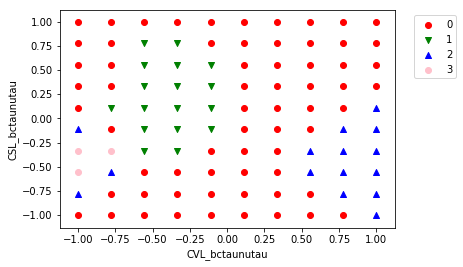

In [29]:
# defining the axes
fig, ax = plt.subplots()
ax.set_xlabel('CVL_bctaunutau')
ax.set_ylabel('CSL_bctaunutau')

# defining a cut in the CT plane
CT_value_index = 2
CT_value = df['CT_bctaunutau'].unique()[CT_value_index]

# running over all CVL and CSL values for the chosen CT plane
for index, cluster in enumerate(clusters):
    df_cluster = df[df['cluster'] == cluster]
    df_cluster = df_cluster[df_cluster['CT_bctaunutau'] == CT_value]
    ax.scatter(
        df_cluster['CVL_bctaunutau'], 
        df_cluster['CSL_bctaunutau'], 
        color=colors[cluster % len(colors)], 
        marker=markers[cluster % len(markers)],
        label=cluster
    )

plt.legend(bbox_to_anchor=(1.2, 1.0));
plt.show()

## Using ``plot_clusters``

Set up the plotter:

In [ ]:
cp = ClusterPlot(d)

In [ ]:
cp.draw_legend=True

### 3D plots

Scatter plot: The list is the list of the columns on the axes. 
Changing the order of the columns will turn around the cube. 

In [ ]:
cp.scatter(['CVL_bctaunutau', 'CSL_bctaunutau', 'CT_bctaunutau'])

If it is still not easy to get an overview, use the ``clusters`` argument to limit ourselves to certain clusters.

In [ ]:
cp.scatter(['CVL_bctaunutau', 'CSL_bctaunutau', 'CT_bctaunutau'], clusters=[0, 2])

In [ ]:
cp.savefig("output/cluster/scatter_3d_02.png")

If only two columns are given, several cuts will be presented (up to 16 by default):

### 2D cuts

Note that the benchmark points are denoted by a larger symbol.

In [ ]:
cp.scatter(['CVL_bctaunutau', 'CSL_bctaunutau'])

Again, we can also limit ourselves on the clusters that we want to display:

In [ ]:
cp.scatter(['CVL_bctaunutau', 'CSL_bctaunutau'], clusters=[1,2])

If many Wilson coefficient points are available, it is better to switch to a 'fill' plot:

In [ ]:
cp.fill(['CVL_bctaunutau', 'CSL_bctaunutau'])

### More configuration

Several options to configure the ClusterPlot object can be changed after the object has been initialized.

The number of plots for the 'slices' is given by

In [ ]:
cp.max_subplots

Let's change that (note that no warning is issued when trying to set a non-existing property, so do be careful with your typing):

In [ ]:
cp.max_subplots = 3

And try it out:

In [ ]:
cp.scatter(['CVL_bctaunutau', 'CSL_bctaunutau'])

In [ ]:
cp.fill(['CVL_bctaunutau', 'CSL_bctaunutau'])

In [ ]:
cp.savefig("output/cluster/fill_2d.png")

To see all options, see the ``Attribute`` section of the help.

In [ ]:
help(cp)